<a href="https://colab.research.google.com/github/choiboy92/knee_parallax/blob/main/interactive_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def viewing_plane_transform(angle_val):
  flexion = angle_val[0]*np.pi/180
  var_val = (angle_val[1]*np.pi/180) + np.pi
  int_ext = (angle_val[2]*np.pi/180) + np.pi/2

  Rx = np.array([[1, 0, 0],
                [0, np.cos(flexion), -np.sin(flexion)],
                [0, np.sin(flexion), np.cos(flexion)]])
  Ry = np.array([[np.cos(var_val), 0, np.sin(var_val)],
                [0, 1, 0],
                [-np.sin(var_val), 0, np.cos(var_val)]])
  Rz = np.array([[np.cos(int_ext), -np.sin(int_ext), 0],
                [np.sin(int_ext), np.cos(int_ext), 0],
                [0, 0, 1]])
  R = Rx.dot(Ry).dot(Rz)
  return R

93.91304825799364


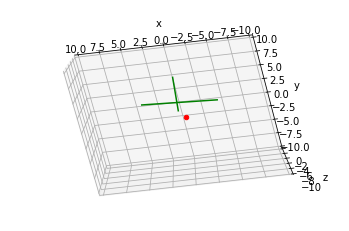

In [2]:
# Vertices of plane with Epicondylar axis & Whitesides FROM BLENDER

#<Vector (44.4236, -0.0000, 9.1508)>      MEDIAL EPICONDYLE
#<Vector (3.6296, -14.9831, 0.7476)>      POSTERIOR WHITESIDES
#<Vector (-0.4435, 45.8136, -0.0914)>     ANTERIOR EPICONDYLE
#<Vector (-44.4236, 0.0000, -9.1508)>     LATERAL EPICONDYLE
#<Vector (-0.0000, 0.0000, 437.3708)>     Hip joint centre
#<Vector (0.0000, 0.0000, 0.0000)>        Midpoint of Epicondylar axis

whitesides_ant = np.array([-0.4435, 45.8136, -0.0914])/10
whitesides_post = np.array([3.6296, -14.9831, 0.7476])/10
whitesides = whitesides_ant - whitesides_post

epicondylar_med = np.array([44.4236, -0.0000, 9.1508])/10
epicondylar_lat = np.array([-44.4236, 0.0000, -9.1508])/10
epicondylar = epicondylar_med - epicondylar_lat

theta_og = np.abs(np.arccos(np.dot(epicondylar, whitesides)/(np.linalg.norm(epicondylar)*np.linalg.norm(whitesides)))*(180/np.pi))
print(theta_og)

# Set camera and viewing positions
camera_d = 100/10
camera = np.array([0,0,camera_d])
Rview = viewing_plane_transform([5, 5, 0])
view_pos = np.matmul(Rview, camera)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_zlim(-10,0)
ax.set_ylim(-10,10)
ax.set_xlim(-10,10)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(elev=-80., azim=100)
# ax.scatter3D(camera[0], camera[1], -camera[2], c="grey")    # Original camera position
ax.scatter3D(view_pos[0], view_pos[1], view_pos[2], c="red")
ax.plot3D([epicondylar_lat[0], epicondylar_med[0]], [epicondylar_lat[1], epicondylar_med[1]], [epicondylar_lat[2], epicondylar_med[2]], 'green')
ax.plot3D([whitesides_post[0], whitesides_ant[0]], [whitesides_post[1], whitesides_ant[1]], [whitesides_post[2], whitesides_ant[2]], 'green')
plt.show()

92.28168775270127
[ 8.65893327  0.22492755 -0.74077364]


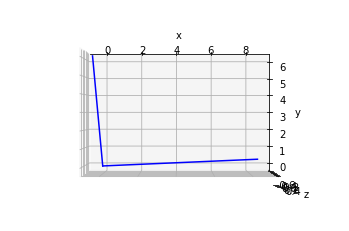

In [3]:
# Project true bone references into viewing plane

normal = np.zeros(3) - view_pos
normal_unit = normal/np.linalg.norm(normal)  # unit normal vector

# Find projected vectors of epicondylar axis and Whitesides onto viewing plane
proj_epicondylar = np.cross(normal_unit, np.cross(epicondylar, normal_unit))
proj_whiteside = np.cross(normal_unit, np.cross(whitesides, normal_unit))

# Calculate angle between projected vectors
theta_proj = np.abs(np.arccos(np.dot(proj_epicondylar, proj_whiteside)/(np.linalg.norm(proj_epicondylar)*np.linalg.norm(proj_whiteside)))*(180/np.pi))
print(theta_proj)

print(proj_epicondylar)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(elev=90., azim=-90)
ax.plot3D([0, proj_epicondylar[0]], [0, proj_epicondylar[1]], [0, proj_epicondylar[2]], 'blue')
ax.plot3D([0, proj_whiteside[0]], [0, proj_whiteside[1]], [0, proj_whiteside[2]], 'blue')
plt.show()

# Use projected true to compare to drawn references in viewing plane